# <font color='red'>Yapay Zeka Ara Sınav Soru 1</font>
Tolga HASTAOĞLU 21040201015


 Soru 1 a) Veri Ön işleme (Çift değerlerin silinmesi, Alakasız değerlerin silinmesi, Tutarsız değerlerin kaldırılması, İstenmeyen sütunun veya satırın kaldırılması, İstenmeyen sütunun veya satırın kaldırılması, Eksik değerlerin silinmesi, Aykırı değerlerin kaldırılması)


In [1]:
#Kullanılacak Kütüphanelerin import edilmesi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Kullanılacak veri çağrılır
data=pd.read_csv("diabetes.csv")
data.head()
#Bu veride amacımız hamilelik sayısı, Glukoz, Tansiyon, cilt kalınlığı,
#İnsülin, vücut kitle endeksi, diabet yüzdesi ve yaşı verilen kişiler için diabet hastası olup olmadığı tahmin etmektir.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Veri Öznitelik Sayısı kontrolü yapılmıştır.
data.shape

(768, 9)

768 satır ve 9 sütundan oluşuyor, Outcome özniteliği bağlımlı, geri kalan 8 öznitelik bağımsız değişken olacaktır.

In [4]:
#Veri içerisinde kayıp değer olup olmadığı kontrolü yapılacaktır
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Ekran çıktısında da görüldüğü üzere veri setimiz hafıza 54.1 kb yer kaplamaktadır, 9 öznitelikte de 768 değer vardır ve herhangi bir kayıp değer bulunmamaktadır

In [5]:
#Yinelenen değer olup olmadığı kontrol edilecektir, eğer yinelenen değer var ise veriden çıkarılacaktır.
data[data.duplicated()==True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Veri içerisinde yinelenen değer olmadığı için herhangi bir silme işlemi yapılmayacaktır.

<AxesSubplot:xlabel='Pregnancies'>

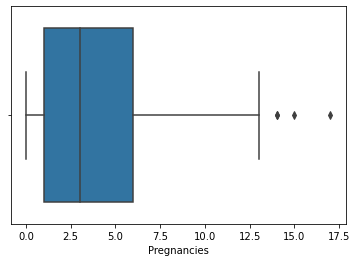

In [6]:
sns.boxplot(x=data["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

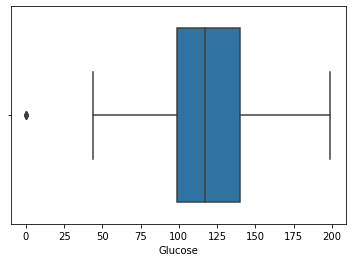

In [7]:
sns.boxplot(x=data["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

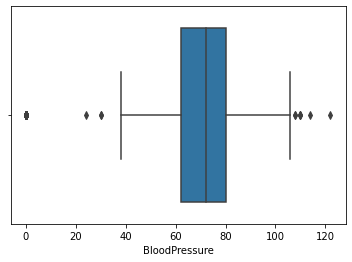

In [8]:
sns.boxplot(x=data["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

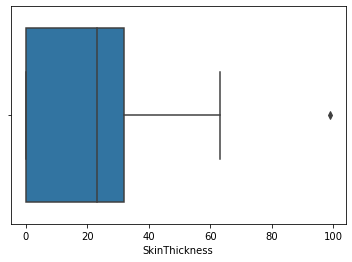

In [9]:
sns.boxplot(x=data["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

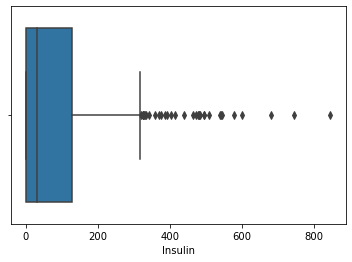

In [10]:
sns.boxplot(x=data["Insulin"])

<AxesSubplot:xlabel='BMI'>

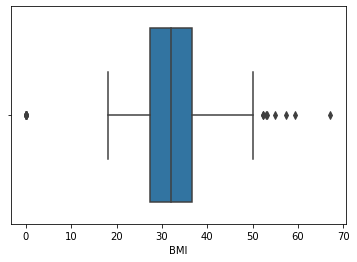

In [11]:
sns.boxplot(x=data["BMI"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

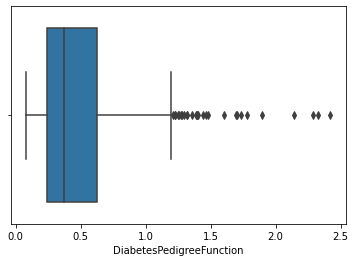

In [12]:
sns.boxplot(x=data["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

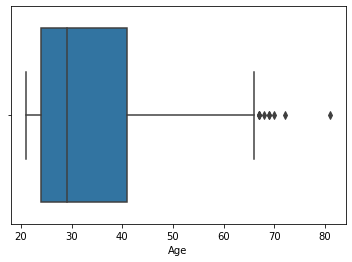

In [13]:
sns.boxplot(x=data["Age"])

Outcome bağımlı değişkendir ve binary biçimindedir, bu nedenle aykırılık analizi ona yapılmamıştır.

Boxplot grafiğinin dışında kalan değerler aykırı değerlerdir, aykırı değerlerin silinmesi hesapların doğruluğunu sağlayacaktır.
Insulin, BMI, DiabetesPedigreeFunction gibi özniteliklerde değerlerin ortalamadan çok saptığı görülmektedir.

In [14]:
#Aykırı değerlerin bulunması için önce kartillerine bakılır, 1. ve 3 kartil arası açıklık(IOR) bulunur.
#Daha sonra IOR 1.5 ile çarpılarak alt ve üst değerler bulunur
def aykırı(veri,feat):
    q1 = np.quantile(veri[feat], 0.25)
    q3 = np.quantile(veri[feat], 0.75)
    fark = q3 - q1
    alt_limit = q1 - (1.5 * fark)
    ust_limit= q3 + (1.5 * fark)
    return veri[(veri[feat] < alt_limit) | (veri[feat] > ust_limit)]


Aykırı değerler yukarıdaki tabloda oluşan fonsiyon ile hesaplanmaktadır, aynı zamanda liste yaparak satır silme için kullanacağız

In [15]:
satirlar=list(data.columns)
for satir in satirlar:
    hesapla=aykırı(data,satir)
    silinecek=list(hesapla.index)
    data=(data.drop(silinecek,axis=0,inplace=False))
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Aykırı değerler silindikten sonra elimizde 636 satır kalmıştır, bu verilerin boxplot grafikleri çizilerek aykırılık için tekrar kontrol edilecektir.

<AxesSubplot:xlabel='Pregnancies'>

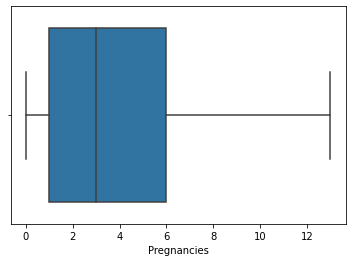

In [16]:
sns.boxplot(x=data["Pregnancies"])

<AxesSubplot:xlabel='Glucose'>

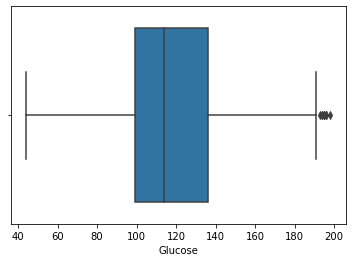

In [17]:
sns.boxplot(x=data["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

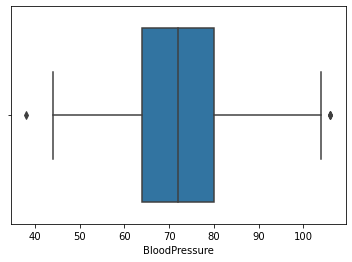

In [18]:
sns.boxplot(x=data["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

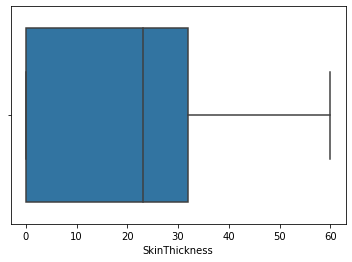

In [19]:
sns.boxplot(x=data["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

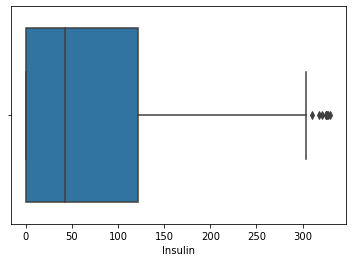

In [20]:
sns.boxplot(x=data["Insulin"])

<AxesSubplot:xlabel='BMI'>

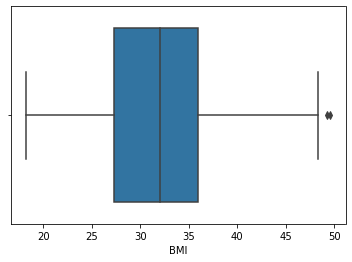

In [21]:
sns.boxplot(x=data["BMI"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

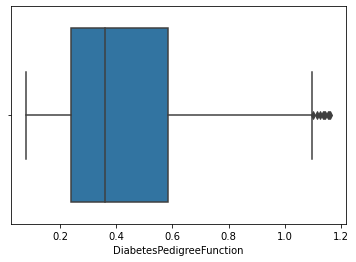

In [22]:
sns.boxplot(x=data["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

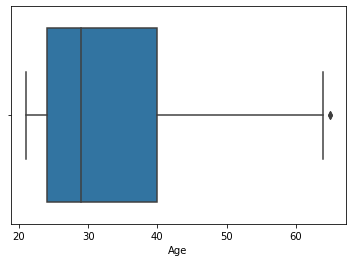

In [23]:
sns.boxplot(x=data["Age"])

Boxplot grafiklerine bakıldığında ilk haline göre düzelmeler olduğu görülmektedir, veriler bu haliyle daha kullanılabilir olmuştur.

# <font color='green'> Soru 1 b) ExtraTreesClassifier ile Öznitelik önemi (Feature importance) çıkarınız.</font>


Önce Kullanılacak kütüphaneler import edilir.

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# ilk 8 özniteliğimiz bağımsız değişkeni 9. özniteliğimiz ise bağımlı değişkeni ifade etmektedir, 
#x ve y değişkenleri bu şekilde hesaplanmıştır.
X = data.iloc[:,0:8] 
y = data.iloc[:,-1] 

In [26]:
#sklearn kütüphanesinin bir fonkiyonu olan ExtraTreeClassifier kullanılarak öznitelik önemliliği hesaplanmıştır.
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.11654456 0.23013    0.09999837 0.082961   0.07543181 0.13521826
 0.11478851 0.14492748]


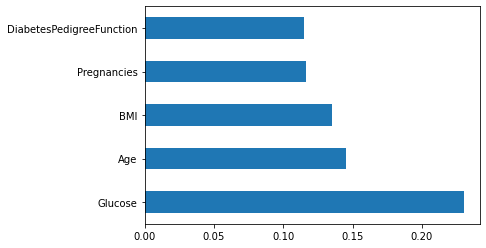

In [27]:
#Hesaplanan en önemli 5 öznitelik grafik hale getirilmiştir.
oznitelik_onemliligi = pd.Series(model.feature_importances_, index=X.
columns)
oznitelik_onemliligi.nlargest(5).plot(kind='barh')
plt.show()

Burada diabet hastalığı için en önemli 5 öznitelik görünmektedir, görüldüğü gibi glukoz, yaş, vücut kitle endeksi şeklinde 
devam etmektedir.

# <font color='green'>Soru 1c) Veri Setindeki en iyi öznitelikleri skorlandırınız, çıkarınız (SelectKBest)</font>


In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression

#sadece ki kare olmamalı ona göre çalıştır

In [29]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)

In [30]:
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['degişsken','score']
print(scores.nlargest(5,'score'))

     degişsken        score
1      Glucose  1093.254462
4      Insulin   845.311059
7          Age   164.617840
0  Pregnancies    98.441333
5          BMI    58.270927


negatif değerler olmadığı için ki kare yöntemine göre bakılmış ve en iyi özniteliklere sahip 5 değişken bulunmuştur. 

In [31]:
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)

In [32]:
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['degişsken','score']
print(scores.nlargest(5,'score'))

       degişsken       score
1        Glucose  203.958073
5            BMI   49.165886
7            Age   48.673427
0    Pregnancies   37.270304
2  BloodPressure   19.138270


Sürekli veri kullanıldığından regresyon da denenmiştir, en önemli ilk 5 öznitelik neredeyse aynıdır bu nedenle Glukoz, yaş, gebelik ve vücut kitle endeksi verimizdeki en önemli öznitelikler olarak görülebilecektir.

# <font color='green'>Soru1d) Korelasyon ısı haritasını çıkarınız.</font>
# 

Isı haritası oluşturmadan önce korelsyon tablosunu çıkarmamız gerekmektedir.

In [33]:
korelasyon=data.corr()

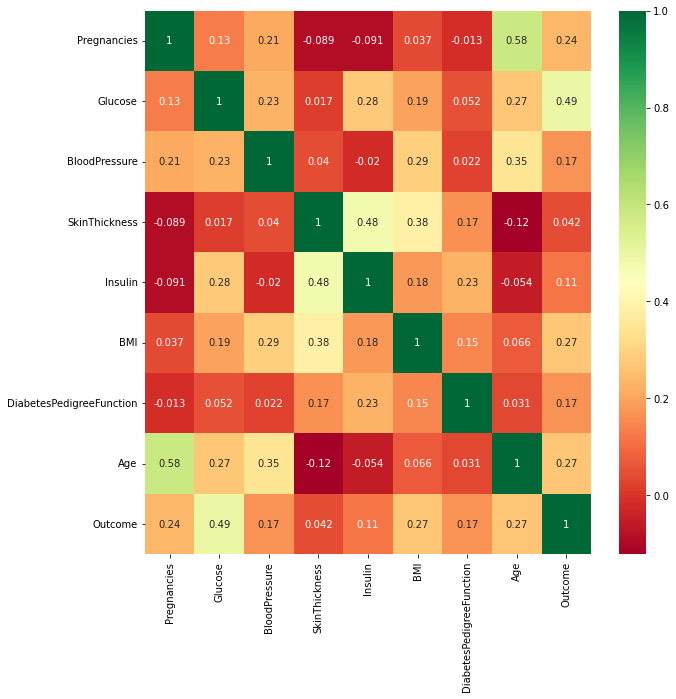

In [34]:
top_corr_features = korelasyon.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Isı haritasında da görüldüğü üzere en yüksek aynı yönlü korelasyon 0.58 ile hamilelik ve yaş arasındadır, ters yönlü ilişkiler ise -0.1 den küçük olduğu için negatif olan ilişkilere ters yönlü zayıf ilişkiler vardır yorumu yapılabilir.


# <font color='green'>Soru1e) Normal dağılıma sahip olmayan verileri standartlaştırınız (Ölçeklendirme, Standartlaştırma, Normalize etme)</font>
 

In [35]:
from scipy import stats

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

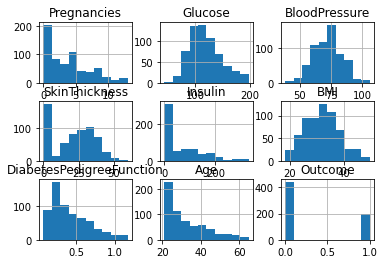

In [36]:
data.hist()

In [37]:
for veri in data:
    ks, p=stats.kstest(data[veri],"norm")
    print(veri+" için değerler "+ str(ks)+" "+str(p))
    if p>0.05:
        print(veri+ " normal dağılmaktadır\n")
    else:
        print(veri+ " normal dağılmamaktadır\n")

Pregnancies için değerler 0.7029799661943291 4.33279643e-316
Pregnancies normal dağılmamaktadır

Glucose için değerler 1.0 0.0
Glucose normal dağılmamaktadır

BloodPressure için değerler 1.0 0.0
BloodPressure normal dağılmamaktadır

SkinThickness için değerler 0.7279874213823679 0.0
SkinThickness normal dağılmamaktadır

Insulin için değerler 0.5283018867924528 4.659208410727626e-166
Insulin normal dağılmamaktadır

BMI için değerler 1.0 0.0
BMI normal dağılmamaktadır

DiabetesPedigreeFunction için değerler 0.5318994570710616 1.6479686362916521e-168
DiabetesPedigreeFunction normal dağılmamaktadır

Age için değerler 1.0 0.0
Age normal dağılmamaktadır

Outcome için değerler 0.5 1.4945571783272715e-147
Outcome normal dağılmamaktadır



Sonuçlarda da görüldüğü üzere elimizde bulunan hiç bir veri Kolmogrov-Smirnov normallik testine göre normal dağılmamaktadır. Bu nedenle verilerimizi normalize edeceğiz.

In [38]:
data1=data.copy()
for veri in data1:
    isim="normalize"+veri
    data1[isim]=(data[veri]-data[veri].min())/(data[veri].max()-data[veri].min())
data1.iloc[:,9:18] 

,normalizePregnancies,normalizeGlucose,normalizeBloodPressure,normalizeSkinThickness,normalizeInsulin,normalizeBMI,normalizeDiabetesPedigreeFunction,normalizeAge,normalizeOutcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.490446,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.267516,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.162420,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.284848,0.315287,0.082103,0.000000,0.0
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.235669,0.113469,0.204545,0.0
...,...,...,...,...,...,...,...,...,...
763,0.769231,0.370130,0.558824,0.800000,0.545455,0.468153,0.085793,0.954545,0.0
764,0.153846,0.506494,0.470588,0.450000,0.000000,0.592357,0.241697,0.136364,0.0
765,0.384615,0.500000,0.500000,0.383333,0.339394,0.254777,0.154059,0.204545,0.0
766,0.076923,0.532468,0.323529,0.000000,0.000000,0.378981,0.250000,0.590909,1.0


Burada normalizasyon tekniği kullanılmış ve veriler (veri-min(veri)/ max(veri)-min(veri)) formülü kullanılarak 0,1 aralığna normalize edilmiştir

In [39]:
data2=data.copy()
for veri in data2:
    isim="Standartize"+veri
    data2[isim]=(data[veri]-data[veri].mean())/(data[veri].std())
data2.iloc[:,9:18] 

,StandartizePregnancies,StandartizeGlucose,StandartizeBloodPressure,StandartizeSkinThickness,StandartizeInsulin,StandartizeBMI,StandartizeDiabetesPedigreeFunction,StandartizeAge,StandartizeOutcome
0,0.680890,1.004612,-0.000696,0.935859,-0.825547,0.256237,0.819146,1.603426,1.491617
1,-0.856915,-1.168044,-0.531617,0.541944,-0.825547,-0.840232,-0.306982,-0.142928,-0.669359
2,1.296012,2.211643,-0.708591,-1.361982,-0.825547,-1.357138,1.002754,-0.051015,1.491617
3,-0.856915,-1.030097,-0.531617,0.148028,0.298830,-0.605274,-1.057733,-1.062062,-0.669359
5,0.373329,-0.098959,0.176278,-1.361982,-0.825547,-0.996870,-0.919008,-0.234842,-0.669359
...,...,...,...,...,...,...,...,...,...
763,1.911133,-0.616258,0.353252,1.789343,1.327515,0.146590,-1.041413,2.798300,-0.669359
764,-0.549354,0.107960,-0.177670,0.410638,-0.825547,0.757480,-0.351864,-0.510582,-0.669359
765,0.373329,0.073474,-0.000696,0.148028,0.514136,-0.902887,-0.739480,-0.234842,-0.669359
766,-0.856915,0.245907,-1.062539,-1.361982,-0.825547,-0.291998,-0.315142,1.327686,1.491617


Burada ise klasik istatistiksel stardatizasyon formülü olan (veri-veri otalaması / standart sapma )kullanılmış ve veri standartlaştırılmıştır

# <font color='green'>Soru1f)Veri üzerinden temel istatistik bilgileri çıkarınız( Mod, Medyan, aritmetik ortalama, varyans, kovaryans, korelasyon)</font>
# 

In [40]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


Burada veriler ile ilgili mean kısmı ortalamaları, std kısmı standar sapmaları göstermektedir, ayrıca minimum, maksimum değerler ve kartiller de görülmektedir

In [41]:
data.median()

Pregnancies                   3.000
Glucose                     114.000
BloodPressure                72.000
SkinThickness                23.000
Insulin                      42.500
BMI                          32.000
DiabetesPedigreeFunction      0.361
Age                          29.000
Outcome                       0.000
dtype: float64

Bu fonksiyon ile de medyan değerleri alınmıştır. VErilerimiz normal dağılmadıoğı için aykırı değerlerden kaçınmak için ortalama yerine medyan kullşanılabilecektir.

In [42]:
data.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,31.6,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,32.0,NaN,NaN,NaN


Bu fonksiyon ile de mod değerleri alınmıştır.

In [43]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130759,0.206581,-0.088675,-0.090608,0.037389,-0.013274,0.582318,0.235631
Glucose,0.130759,1.000000,0.227750,0.017161,0.280328,0.193989,0.051546,0.268977,0.493355
BloodPressure,0.206581,0.227750,1.000000,0.039799,-0.019897,0.290307,0.022308,0.345872,0.171178
SkinThickness,-0.088675,0.017161,0.039799,1.000000,0.475258,0.383783,0.165758,-0.122427,0.042490
Insulin,-0.090608,0.280328,-0.019897,0.475258,1.000000,0.177380,0.225171,-0.053711,0.114653
BMI,0.037389,0.193989,0.290307,0.383783,0.177380,1.000000,0.148256,0.066110,0.268268
DiabetesPedigreeFunction,-0.013274,0.051546,0.022308,0.165758,0.225171,0.148256,1.000000,0.031168,0.168112
Age,0.582318,0.268977,0.345872,-0.122427,-0.053711,0.066110,0.031168,1.000000,0.267017
Outcome,0.235631,0.493355,0.171178,0.042490,0.114653,0.268268,0.168112,0.267017,1.000000


Kullandığımız özniteliklerin korelasyon tablosu üstteki gibi oluşmaktadır, Korealsyon ısı grafiğinde yapılan yorumları burası için de yapabiliriz.


In [44]:
varyans=(data.std())**2
varyans

Pregnancies                   10.571525
Glucose                      840.812863
BloodPressure                127.714899
SkinThickness                232.004308
Insulin                     6989.270567
BMI                           40.757138
DiabetesPedigreeFunction       0.060068
Age                          118.370195
Outcome                        0.214141
dtype: float64

Varyans değeri standart sapmanın karesi olduğundan yukarıda gösterildiği gibi önce std sapma bulunmuş ve karesi alınmıştır

In [45]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,10.571525,12.327955,7.590660,-4.391561,-24.629367,0.776102,-0.010577,20.599188,0.354529
Glucose,12.327955,840.812863,74.632524,7.579305,679.567615,35.911062,0.366324,84.856799,6.620014
BloodPressure,7.590660,74.632524,127.714899,6.850825,-18.798561,20.945007,0.061789,42.526338,0.895199
SkinThickness,-4.391561,7.579305,6.850825,232.004308,605.191814,37.319516,0.618791,-20.288323,0.299495
Insulin,-24.629367,679.567615,-18.798561,605.191814,6989.270567,94.672117,4.613712,-48.853709,4.435579
BMI,0.776102,35.911062,20.945007,37.319516,94.672117,40.757138,0.231972,4.591897,0.792539
DiabetesPedigreeFunction,-0.010577,0.366324,0.061789,0.618791,4.613712,0.231972,0.060068,0.083109,0.019067
Age,20.599188,84.856799,42.526338,-20.288323,-48.853709,4.591897,0.083109,118.370195,1.344345
Outcome,0.354529,6.620014,0.895199,0.299495,4.435579,0.792539,0.019067,1.344345,0.214141


En son olarak Veriye ait kovaryans tablosu oluşturulmuştur